# Diabetes Risk Prediction

## Objective
The goal of this project is to predict the **risk of diabetes** based on patient data, including demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of individuals with features relevant to diabetes risk assessment.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for diabetes risk.
4. **Model Training**: Train a classification model to predict diabetes risk.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [5]:

# Load the dataset
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# Display basic information about the dataset
unique_df = {col: df[col].unique() for col in df.columns}
unique_df

{'male': array([1, 0]),
 'age': array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
        59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
        68, 33, 70, 32, 69]),
 'education': array([ 4.,  2.,  1.,  3., nan]),
 'currentSmoker': array([0, 1]),
 'cigsPerDay': array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
         2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
         7.,  6., 38., 29., 17., 16., 19., 70.]),
 'BPMeds': array([ 0.,  1., nan]),
 'prevalentStroke': array([0, 1]),
 'prevalentHyp': array([0, 1]),
 'diabetes': array([0, 1]),
 'totChol': array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
        294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
        272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
         nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
        255., 220., 235., 212., 223., 300., 302., 248., 200

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [10]:
# Check for missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
#imputing missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [13]:
df2.isnull().sum().sum()

np.int64(0)

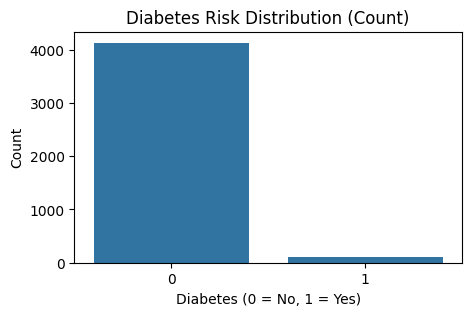

In [20]:
# Visualize diabetes risk distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='diabetes')
plt.title('Diabetes Risk Distribution (Count)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [21]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [ ]:

# Drop unnecessary columns (e.g., Patient ID if present)
# Encode categorical variables
# df = pd.get_dummies(df, drop_first=True)

# Define features and target variable


In [22]:
#Using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df3.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


## Model Training
Train a **Logistic Regression** model to predict diabetes risk.

In [26]:
df3.isnull().sum().sum()

np.int64(645)

In [27]:
df3 = df3.fillna(df3.mean(numeric_only=True))

In [30]:
df3.isnull().sum().sum()

np.int64(0)

In [32]:
print(df3["TenYearCHD"].value_counts())

TenYearCHD
0.0    3596
1.0     644
Name: count, dtype: int64


In [33]:
#handle imbalanced data
from sklearn.utils import resample

df4 = df3.copy()
df4['TenYearCHD'] = df3['TenYearCHD']

df_majority = df4[df4['TenYearCHD'] == 0]
df_minority = df4[df4['TenYearCHD'] == 1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

df5 = pd.concat([df_majority, df_minority_upsampled])

x = df5.drop("TenYearCHD", axis=1)
y = df5["TenYearCHD"]

In [34]:
print(df5["TenYearCHD"].value_counts())

TenYearCHD
0.0    3596
1.0    3596
Name: count, dtype: int64


In [35]:

# Train a Logistic Regression model

# Predictions


# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x = df5.drop("TenYearCHD", axis=1)
y = df5["TenYearCHD"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[479 256]
 [241 463]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       735
         1.0       0.64      0.66      0.65       704

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439

Accuracy Score: 0.6546212647671994


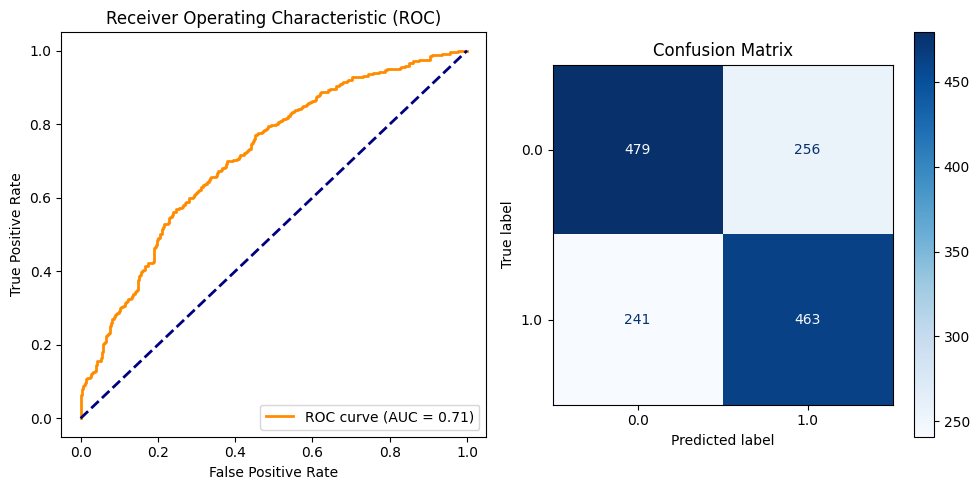

In [37]:
#plotting
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), values_format='d')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()